# 股市資料蒐集、爬蟲



## 取得證交所資料
1. 進入股市資訊網網址：https://goodinfo.tw/tw/index.asp
2. 使用開發者模式取得請求資料網址

### 匯入套件

In [63]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
# import datetime as dt

### 取得每一年度的配息資訊

In [64]:
# "上緯投控"股票代號
stock_id = '3708'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'cookie': 'CLIENT%5FID=20250913102859304%5F162%2E120%2E185%2E42; CLIENT%5FID=20250913102859304%5F162%2E120%2E185%2E42; IS_TOUCH_DEVICE=F; SCREEN_SIZE=WIDTH=1536&HEIGHT=864; TW_STOCK_BROWSE_LIST=3708; _ga_0LP5MLQS7E=GS2.1.s1757730557$o1$g0$t1757730557$j60$l0$h0; _ga=GA1.1.1260270299.1757730558; cto_bundle=u9fMMl9WckQ3dGg4WjJObFFKUVo0Z1VxVDUzcW54YXZ4bFpKY2JWbFBMUjZCWEloOVpVblpFZWliSmExUHpRZURueEpocXhmbGVIR2tWUDZTaWt6V2ltU2klMkJCNDBTZGZVa1NOJTJCekVIcUklMkJGMzYlMkJ6Yk5nYjJoMnp5SjBRUTFrNkoxNnNBRkxNREMzMEZUcHhPdUwzMXJScm5BdyUzRCUzRA; FCNEC=%5B%5B%22AKsRol8nClEzZs3tmE08GdTeo55ve5j2fuJBKntOOR0yj4S6w9uVVo-Hvad10KMh04epAfOKURnXuO_vx2H5sG-04YznND_ma5r8ovJGLmPx7nCykpqz2InM5R1chYjvtkrk8nkcKOrFWTtz_tjB0tae4LeIkgVWgw%3D%3D%22%5D%5D'
}
res = requests.get(f'https://goodinfo.tw/tw/StockDetail.asp?STOCK_ID={stock_id}',headers=headers)
res.encoding = 'utf-8'
# res.text

In [65]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text,'lxml')
data = soup.select_one('#divDividendPolicy')
rows = data.find_all("tr")
myData = []
for row in rows[1:-1]:
    cols = row.find_all(["th","td"])
    cols = [ele.get_text(strip=True) for ele in cols] # 自動去除前後的空白與換行
    myData.append(cols)
myData

[['2025', '年', '2.345', '0', '2.345', '90', '2.61'],
 ['2024', '年', '5.551', '0', '5.551', '118', '4.72'],
 ['2023', '年', '5', '0', '5', '96.5', '5.18'],
 ['2022', '年', '1.429', '0', '1.429', '104', '1.37'],
 ['2021', '年', '3.5', '0', '3.5', '115', '3.04'],
 ['2020', '年', '4.002', '0', '4.002', '109', '3.67'],
 ['2019', '年', '5', '0', '5', '87.2', '5.73'],
 ['2018', '年', '1.99', '0', '1.99', '86', '2.31'],
 ['2017', '年', '1.011', '0', '1.011', '75.6', '1.34']]

In [66]:
rows

[<tr class="bg_h1"><th width="14%"><nobr>發放<br/>年度</nobr></th><th width="14%"><nobr>發放<br/>頻率</nobr></th><th width="14%"><nobr>現金<br/>(元)</nobr></th><th width="14%"><nobr>股票<br/>(元)</nobr></th><th width="14%"><nobr>合計<br/>(元)</nobr></th><th width="14%"><nobr>年均<br/>收盤價</nobr></th><th width="14%"><nobr>年均<br/>現金<br/>殖利率</nobr></th></tr>,
 <tr align="center"><th>2025</th><th>年</th><td>2.345</td><td>0</td><td>2.345</td><td>90</td><td>2.61</td></tr>,
 <tr align="center"><th>2024</th><th>年</th><td>5.551</td><td>0</td><td>5.551</td><td>118</td><td>4.72</td></tr>,
 <tr align="center"><th>2023</th><th>年</th><td>5</td><td>0</td><td>5</td><td>96.5</td><td>5.18</td></tr>,
 <tr align="center"><th>2022</th><th>年</th><td>1.429</td><td>0</td><td>1.429</td><td>104</td><td>1.37</td></tr>,
 <tr align="center"><th>2021</th><th>年</th><td>3.5</td><td>0</td><td>3.5</td><td>115</td><td>3.04</td></tr>,
 <tr align="center"><th>2020</th><th>年</th><td>4.002</td><td>0</td><td>4.002</td><td>109</td><td>3.67</td></

In [67]:
dfs = pd.read_html(data.prettify())


/tmp/ipython-input-379238959.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(data.prettify())


In [68]:
dfs[0]

,發放 年度,發放 頻率,現金 (元),股票 (元),合計 (元),年均 收盤價,年均 現金 殖利率,Unnamed: 7,Unnamed: 8
0,2025,年,2.345,0,2.345,90,2.61,NaN,NaN
1,2024,年,5.551,0,5.551,118,4.72,NaN,NaN
2,2023,年,5,0,5,96.5,5.18,NaN,NaN
3,2022,年,1.429,0,1.429,104,1.37,NaN,NaN
4,2021,年,3.5,0,3.5,115,3.04,NaN,NaN
5,2020,年,4.002,0,4.002,109,3.67,NaN,NaN
6,2019,年,5,0,5,87.2,5.73,NaN,NaN
7,2018,年,1.99,0,1.99,86,2.31,NaN,NaN
8,2017,年,1.011,0,1.011,75.6,1.34,NaN,NaN
9,* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計),* 連續9年配發股利 (依發放年度統計)


In [69]:
# 整理成DataFrame
df = pd.DataFrame(myData, columns=["年度","發放頻率","現金股利","股票股利","合計","年均收盤價","年均殖利率"])
numeric_cols = ["現金股利","股票股利","合計","年均收盤價","年均殖利率"]
# 轉換成數值型態
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df


,年度,發放頻率,現金股利,股票股利,合計,年均收盤價,年均殖利率
0,2025,年,2.345,0,2.345,90.0,2.61
1,2024,年,5.551,0,5.551,118.0,4.72
2,2023,年,5.000,0,5.000,96.5,5.18
3,2022,年,1.429,0,1.429,104.0,1.37
4,2021,年,3.500,0,3.500,115.0,3.04
5,2020,年,4.002,0,4.002,109.0,3.67
6,2019,年,5.000,0,5.000,87.2,5.73
7,2018,年,1.990,0,1.990,86.0,2.31
8,2017,年,1.011,0,1.011,75.6,1.34


# <b>資料可視化</b>

## 可視化股利 & 殖利率趨勢折線圖

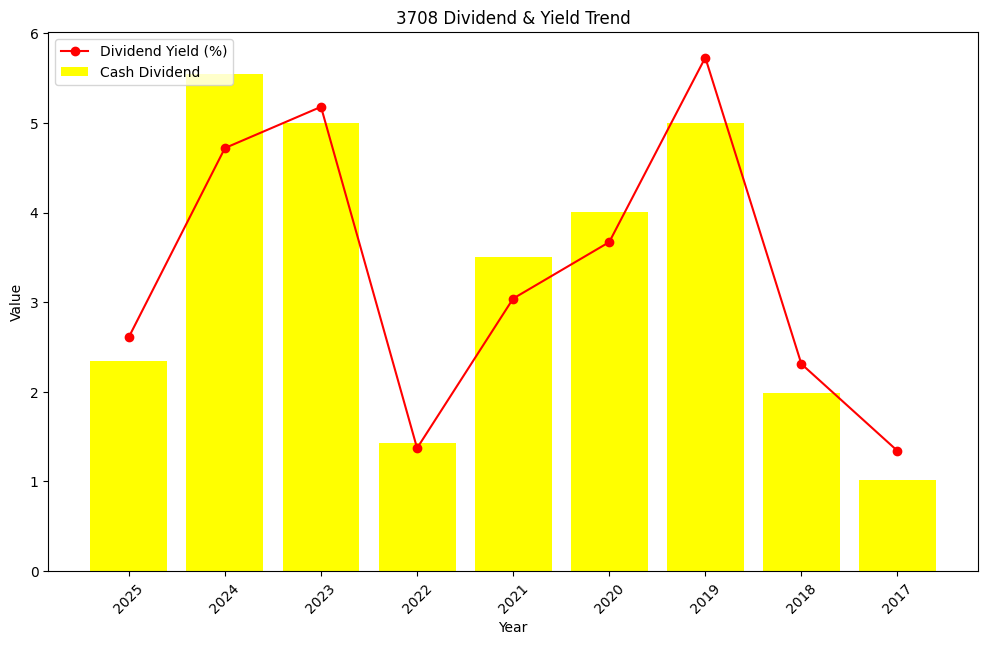

In [70]:
import matplotlib.pyplot as plt


# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

plt.bar(df["年度"], df["現金股利"], color="yellow", label="Cash Dividend")
plt.plot(df["年度"], df["年均殖利率"], color="red", marker="o", label="Dividend Yield (%)")

plt.xticks(rotation=45)
plt.title(f'{stock_id}'+ " Dividend & Yield Trend")   # 將股票代號設為圖標
plt.xlabel('Year')         # x 軸標籤
plt.ylabel('Value')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例


# 顯示圖表
plt.show()
